In [1]:
from pathlib import Path
import pandas as pd

DATA_PATH = Path('/Users/powerbai/Desktop/Power Bai/Data Analyst Bootcamp/Portfolio Projects/bike-share-demand-analysis/data_processed/daily_demand.csv')

daily = pd.read_csv(
    DATA_PATH,
    parse_dates = ["date"]
)

daily.head(), daily.shape

(        date  daily_ride_count  avg_ride_length_min
 0 2024-06-29                 3          1499.766583
 1 2024-06-30               234           483.388354
 2 2024-07-01             21555            18.747473
 3 2024-07-02             23031            17.405056
 4 2024-07-03             25046            18.489790,
 (551, 3))

In [2]:
daily.dtypes

date                   datetime64[ns]
daily_ride_count                int64
avg_ride_length_min           float64
dtype: object

In [3]:
daily_ts = (
    daily
    .set_index("date")
    .asfreq("D")
)

daily_ts = daily_ts.loc["2024-07-01":]

daily_ts.head()

,daily_ride_count,avg_ride_length_min
date,,
2024-07-01,21555,18.747473
2024-07-02,23031,17.405056
2024-07-03,25046,18.489790
2024-07-04,23612,25.173394
2024-07-05,26092,23.219040


In [4]:
daily_ts.isna().sum()

daily_ride_count       0
avg_ride_length_min    0
dtype: int64

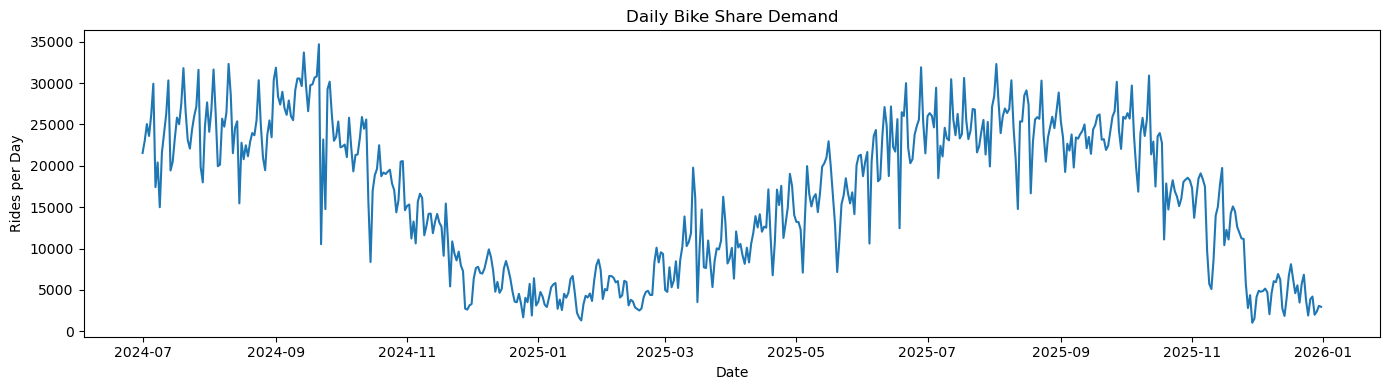

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 4))
plt.plot(daily_ts.index, daily_ts["daily_ride_count"])
plt.title("Daily Bike Share Demand")
plt.xlabel("Date")
plt.ylabel("Rides per Day")
plt.tight_layout()
plt.show()

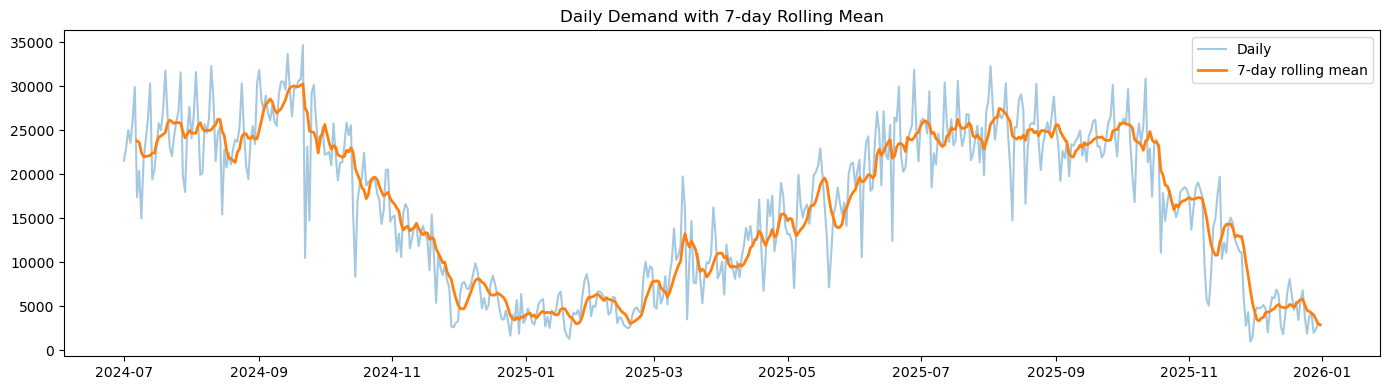

In [6]:
daily_ts["rolling_7d"] = daily_ts["daily_ride_count"].rolling(window = 7).mean()

plt.figure(figsize = (14, 4))
plt.plot(daily_ts.index, daily_ts["daily_ride_count"], alpha = 0.4, label = "Daily")
plt.plot(daily_ts.index, daily_ts["rolling_7d"], linewidth = 2, label = "7-day rolling mean")
plt.legend()
plt.title("Daily Demand with 7-day Rolling Mean")
plt.tight_layout()
plt.show()

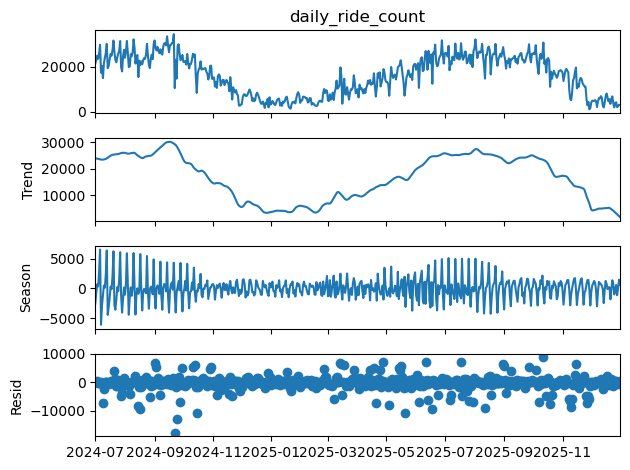

In [7]:
from statsmodels.tsa.seasonal import STL

stl = STL(
    daily_ts["daily_ride_count"],
    period = 7,
    robust = True
)

res = stl.fit()
res.plot()
plt.show()

In [8]:
daily_ts["dow"] = daily_ts.index.dayofweek  # Monday = 0, Sunday = 6

daily_ts.groupby("dow")["daily_ride_count"].mean()

dow
0    15168.848101
1    15901.810127
2    16257.974684
3    16970.589744
4    17418.820513
5    18166.282051
6    14999.794872
Name: daily_ride_count, dtype: float64

In [9]:
daily_ts["seasonal"] = res.seasonal

daily_ts.groupby("dow")["seasonal"].mean()

dow
0   -1630.425043
1     279.917145
2     -48.333304
3     395.761462
4     478.566643
5    1781.298569
6   -1224.860544
Name: seasonal, dtype: float64

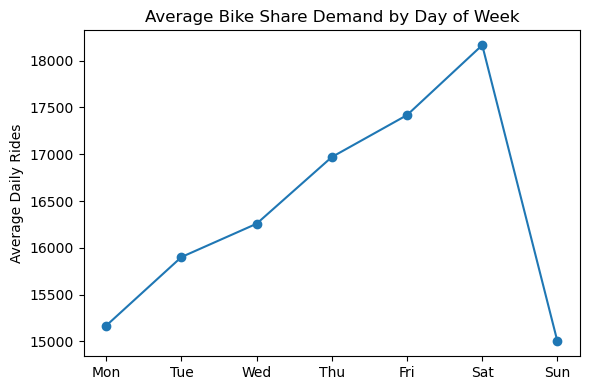

In [10]:
dow_mean = daily_ts.groupby("dow")["daily_ride_count"].mean()

plt.figure(figsize = (6, 4))
plt.plot(dow_mean.index, dow_mean.values, marker = "o")
plt.xticks(
    ticks = range(7),
    labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
)
plt.title("Average Bike Share Demand by Day of Week")
plt.ylabel("Average Daily Rides")
plt.tight_layout()
plt.show()

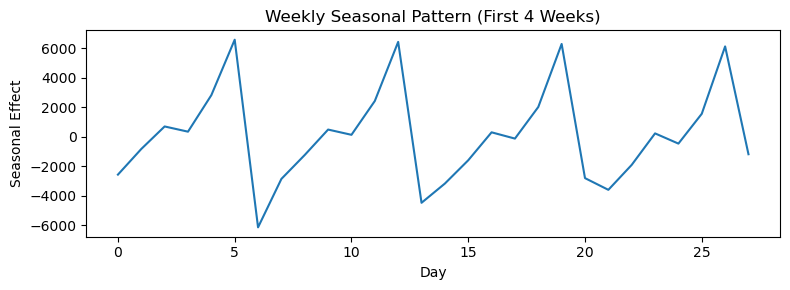

In [11]:
seasonal_short = res.seasonal.iloc[:28]  

plt.figure(figsize = (8, 3))
plt.plot(seasonal_short.values)
plt.title("Weekly Seasonal Pattern (First 4 Weeks)")
plt.xlabel("Day")
plt.ylabel("Seasonal Effect")
plt.tight_layout()
plt.show()